# Project: Investigate a Dataset - [TMDb Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction

### Dataset Description

This project analyzes the **TMDb Movie Dataset**, which contains information on approximately **10,000 movies** collected from **The Movie Database (TMDb)**. The dataset includes details about movies such as titles, genres, production companies, budgets, revenues, user ratings and more.

---

### Column Names & Their Significance

The dataset consists of a **single table** with **21 columns**, where each row represents a **unique movie**. Below is a breakdown of these columns:

#### **1. Movie Identification**
- **`id`** - Unique identifier for each movie.
- **`imdb_id`** - Unique identifier assigned by IMDb.

#### **2. Movie Information**
- **`original_title`** - The original title of the movie.
- **`release_date`** - The date when the movie was released.
- **`runtime`** - The total duration of the movie in minutes.
- **`overview`** - A short description summarizing the movie.
- **`keywords`** - Important keywords associated with the movie.

#### **3. Cast & Production Details**
- **`cast`** - The main actors in the movie.
- **`director`** - The director of the movie.
- **`genres`** - The genre(s) of the movie (e.g., Action, Comedy).
- **`production_companies`** - The companies responsible for producing the movie.

#### **4. Financial Data**
- **`budget`** - The production budget of the movie (in USD).
- **`revenue`** - The total earnings of the movie (in USD).
- **`budget_adj` & `revenue_adj`** - Budget and revenue adjusted for inflation in 2010 dollars.

#### **5. Popularity & Ratings**
- **`popularity`** - A score representing how popular a movie was.
- **`vote_count`** - The total number of votes submitted by users.
- **`vote_average`** - The average rating given by users.

#### **6. Additional Metadata**
- **`release_year`** - The year the movie was released.
- **`tagline`** - A short promotional phrase for the movie.
- **`homepage`** - The official website of the movie.


---

### Relationship Between Tables

Since the dataset consists of a **single table**, there are no separate linked tables. However, some columns, such as **`genres`**, **`cast`**, and **`production_companies`**, contain **multiple values separated by a pipe (`|`)**. This means that a movie can belong to multiple genres, have multiple actors, or be produced by multiple companies.

To analyze these **multi-value columns**, we may need to **split them into separate records** or perform string-based filtering. This will allow us to gain deeper insights into **which genres are most successful, how different directors perform, and which actors contribute to high-grossing movies**.

---

### Questions for Analysis

The primary questions we aim to answer in this analysis are:  

1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues? 
---

<a id='wrangling'></a>
## Data Wrangling

### Importing Libraries & Loading the Dataset

To begin the analysis, we imported essential Python libraries and loaded the TMDb dataset.


In [180]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
# Load the dataset
df = pd.read_csv("tmdb-movies.csv")

---
### General Properties

To understand the structure of the dataset before cleaning, we will explore its basic properties:

- **Size of the dataset**: Number of rows and columns.
- **Column names and data types**: Checking the types of data stored in each column.
- **Missing values**: Identifying any columns with null values.
- **Duplicates**: Checking if the dataset contains duplicate rows.

In [182]:
# To confirm the dataset is loaded
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [183]:
# Check the number of rows and columns
df.shape

(10866, 21)

#### Dataset Size:
- The dataset contains **10,866 rows** and **21 columns**.
- This gives us an idea of how much data we are working with.

In [184]:
# Check column names, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Column Names & Data Types:
- The dataset contains **21 columns** with various data types.
- Some columns have **missing values**, which need further investigation.
- We will determine whether to **fill or drop** missing values in the next steps.

In [185]:
# Count missing values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Missing Values:
- Some columns have missing values.
- We will decide how to handle them (remove or fill) based on their importance.

In [186]:
# Check for duplicates
df.duplicated().sum()

1

#### Duplicate Rows:
- The dataset contains **1 duplicated row**.
- If necessary, we will remove it to avoid redundancy.
---

### Data Cleaning

#### Issues Identified:
To ensure the dataset is clean and ready for analysis, we performed several data cleaning steps.


#### 1. Handling Missing Values  

Some columns contain a **large number of missing values** or are **not useful for our analysis**. We addressed missing values using the following steps:  

- Dropped columns with too many missing values.
- Removed columns that will not be used in our analysis.
- Dropped rows where critical columns have missing values.



#### 2. Fixing & Optimizing Data Types 
To ensure correct data formatting:  

- Converted release_date from object to datetime format.  
- Ensured **budget, revenue, and other numerical fields** were stored as numeric values.

Some columns contain a **small range of values** but are stored in unnecessarily large data types. To **optimize memory usage**, we:  

- Converted columns with a small range to more efficient data types. 




#### 3. Removing Duplicate Rows  

The dataset contains **1 duplicated row**, which was removed to prevent redundancy.  



#### 4. Final Check 
After completing these cleaning steps, we verified:  

- **No missing values remain in critical columns.**  
- **Data types are correctly formatted.**  
- **The dataset is free of duplicates.**  



### Handling Missing Values 

In [187]:
# Display columns with missing values again before deciding how to handle them
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [188]:
# Drop 'homepage' and 'tagline' columns as they have too many missing values and are not useful for the analysis
df.drop(columns=['homepage', 'tagline'], inplace=True)

In [189]:
# Drop unnecessary columns that will not be used in the analysis
df.drop(columns=['overview', 'keywords', 'imdb_id', 'cast', 'production_companies'], inplace=True)

In [190]:
# Drop rows where critical columns have missing values
df.dropna(subset=['genres', 'director'], inplace=True)

In [191]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

### Fixing & Optimizing Data Types  

In [192]:
# Check data types
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [193]:
# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

In [194]:
# Convert columns with a small range of values to more efficient data types
df['vote_count'] = df['vote_count'].astype('int32')
df['runtime'] = df['runtime'].astype('int16')

In [195]:
df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
director                  object
runtime                    int16
genres                    object
release_date      datetime64[ns]
vote_count                 int32
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

### Removing Duplicate Rows  

In [196]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

### Final Check

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10800 non-null  int64         
 1   popularity      10800 non-null  float64       
 2   budget          10800 non-null  int64         
 3   revenue         10800 non-null  int64         
 4   original_title  10800 non-null  object        
 5   director        10800 non-null  object        
 6   runtime         10800 non-null  int16         
 7   genres          10800 non-null  object        
 8   release_date    10800 non-null  datetime64[ns]
 9   vote_count      10800 non-null  int32         
 10  vote_average    10800 non-null  float64       
 11  release_year    10800 non-null  int64         
 12  budget_adj      10800 non-null  float64       
 13  revenue_adj     10800 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int16(1), int32(1), 

In [198]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [199]:
df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
director                  object
runtime                    int16
genres                    object
release_date      datetime64[ns]
vote_count                 int32
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

In [200]:
df.duplicated().sum()

0

The dataset has now been successfully cleaned and is ready for analysis. After performing data cleaning, we have ensured that:

- **No missing values remain in critical columns.**  
- **Unnecessary columns have been removed.**  
- **All data types are correctly formatted and optimized for memory efficiency.**  
- **Duplicate rows have been removed, ensuring data consistency.**  

With a fully cleaned dataset, we can now proceed to the **Exploratory Data Analysis (EDA)** phase to explore trends and answer our research questions.

---

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Which genres are most popular from year to year? 
To answer this question, we used **data cleaning, analysis, and multiple visualizations** to explore the popularity of different movie genres across different years.

---

#### Step 1: Preparing the Data
##### Issue: Multi-Genre Movies Were Stored in a Single Row  
- The `genres` column contained multiple genres separated by a pipe (`|`).
- This made it difficult to analyze each genre individually.

##### Solution: Splitting Genres Using `.explode()`
- We split the `genres` column so that each genre gets its own row.
- This ensured that movies with multiple genres were counted in each category separately.

In [201]:
# Split Multi-Genre Movies
df_exploded = df.copy()  # Create a copy to avoid modifying original data

# Convert genre column into a list by splitting on '|', then explode
df_exploded['genres'] = df_exploded['genres'].str.split('|')
df_exploded = df_exploded.explode('genres')

# Confirm changes
df_exploded.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [202]:
# Count the number of movies per genre
genre_counts = df_exploded['genres'].value_counts()

# Display the top genres
genre_counts

Drama              4754
Comedy             3782
Thriller           2904
Action             2378
Romance            1708
Horror             1636
Adventure          1466
Crime              1353
Science Fiction    1223
Family             1223
Fantasy             912
Mystery             809
Animation           692
Documentary         509
Music               402
History             332
War                 270
Foreign             185
Western             164
TV Movie            162
Name: genres, dtype: int64

---

#### Step 2: Identifying Popular Genres
After preparing the data, we analyzed genre popularity using two different approaches.

##### 1. Pie Chart – Overall Most Popular Genres
- **Goal:** Identify the most popular genres based on average popularity scores.
- **Method:** We calculated the mean popularity for each genre and displayed the top 5 genres using a pie chart.
- **Insight:** This visualization gave us a high-level overview of which genres consistently have higher popularity ratings.

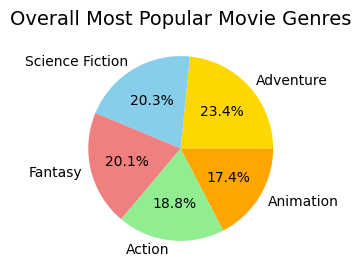

In [203]:
# Calculate Average Popularity for Each Genre
genre_popularity = df_exploded.groupby('genres')['popularity'].mean().sort_values(ascending=False)

# Plot Pie Chart for Top 5 Popular Genres
plt.figure(figsize=(6, 3))
top_5_genres = genre_popularity.head(5)

plt.pie(top_5_genres, labels=top_5_genres.index, autopct='%1.1f%%', colors=['gold', 'skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Overall Most Popular Movie Genres', fontsize=14)
plt.show()

##### 2. Count Plot – Most Popular Genre in Each Year
- **Goal:** Find the most popular genre in each year and see which genres dominated over time.
- **Method:**  
  - We grouped the dataset by release year and calculated the most popular genre for each year.
  - Using `idxmax()`, we identified the highest-rated genre per year.
  - A count plot was used to count how many times each genre was the most popular across different years.
- **Insight:**  
  - This visualization helped us see trends over time.  
  - Some genres were consistently the most popular, while others had temporary spikes in popularity.

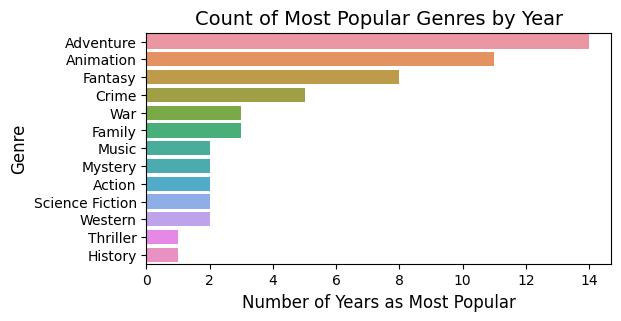

In [204]:
# Calculate Yearly Popularity for Each Genre
genre_yearly_popularity = df_exploded.groupby(['release_year', 'genres'])['popularity'].mean().reset_index()

# Find the Most Popular Genre for Each Year
most_popular_per_year = genre_yearly_popularity.loc[genre_yearly_popularity.groupby('release_year')['popularity'].idxmax()]

# Count Plot - Most Popular Genre Per Year
plt.figure(figsize=(6,3))
sns.countplot(data=most_popular_per_year, y='genres', order=most_popular_per_year['genres'].value_counts().index)

plt.title('Count of Most Popular Genres by Year', fontsize=14)
plt.xlabel('Number of Years as Most Popular', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

---
#### Summary of Findings

- The **pie chart** analysis of average popularity scores across genres reveals that **Adventure (23.4%)**, **Science Fiction (20.3%)**, and **Fantasy (20.1%)** are among the most popular genres.  
- The **count plot** of the most popular genres by year shows that **Adventure** appears most frequently as the top genre, followed by **Animation** and **Fantasy**.  
- Certain genres, such as **Adventure, Animation, and Fantasy**, have remained consistently popular over the years.  
- Other genres, including **Crime, War, and Music**, occasionally emerge as the most popular in specific years but do not dominate consistently.  

These insights highlight that **Adventure and Fantasy genres have maintained strong audience interest over time**, making them key players in the movie industry.


---

### Question 2: What kinds of properties are associated with movies that have high revenues?

To identify the key factors influencing movie revenue, we analyzed high-revenue films across various attributes, including **budget, runtime, popularity, and vote count**.

---

#### Step 1: Defining High-Revenue Movies
To focus on **high-revenue movies**, we filtered the dataset using the **75th percentile (top 25%)** of adjusted revenue (`revenue_adj`). This ensures we analyze films that are significantly successful in terms of revenue.

In [205]:
# Calculate the 75th percentile for adjusted revenue
high_revenue = df['revenue_adj'].quantile(0.75)

# Filter movies with high revenue
df_high_revenue = df[df['revenue_adj'] >= high_revenue]

# Display summary
df_high_revenue.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


---
#### Step 2: Analyzing Properties of High-Revenue Movies
We examined how **budget, runtime, popularity, and vote count** relate to high revenues using different visualizations.

##### **Budget vs. Revenue**
- A **bar chart** was used to categorize movies into **Low, Medium, High, and Very High budget groups**.
- Findings show a **clear positive correlation** between budget and revenue.
- **Movies with the highest budgets tend to generate significantly higher revenue.**

**Additionally, a custom function was created to categorize movies based on their budget:**
- **`categorize_budget()`**: Groups movies into **Low, Medium, High, and Very High budget categories** based on their adjusted budget.

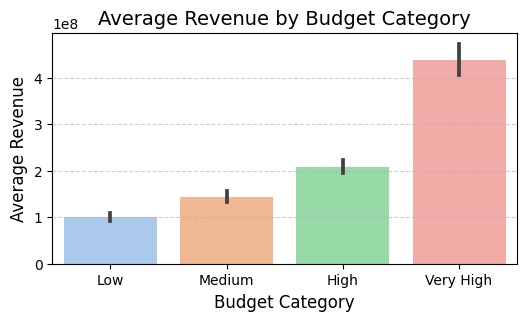

In [206]:
# Make a copy
df_high_revenue = df_high_revenue.copy()

# Define budget categories
def categorize_budget(value):
    if value < 10_000_000:
        return 'Low'
    elif value < 50_000_000:
        return 'Medium'
    elif value < 100_000_000:
        return 'High'
    else:
        return 'Very High'

df_high_revenue['budget_category'] = df_high_revenue['budget_adj'].apply(categorize_budget)

# Bar plot: Budget categories vs Average Revenue
plt.figure(figsize=(6,3))
sns.barplot(data=df_high_revenue, x='budget_category', y='revenue_adj', palette="pastel", order=['Low', 'Medium', 'High', 'Very High'])

plt.title("Average Revenue by Budget Category", fontsize=14)
plt.xlabel("Budget Category", fontsize=12)
plt.ylabel("Average Revenue", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### **Runtime vs. Revenue**
- Another **bar chart** categorized movies based on runtime (Short, Medium, Long, and Very Long).
- **Longer movies tend to earn higher revenue**, with the highest earnings seen in the **Very Long category**.

**To support this analysis, another custom function was created:**
- **`categorize_runtime()`**: Classifies movies into **Short, Medium, Long, and Very Long** based on their runtime.

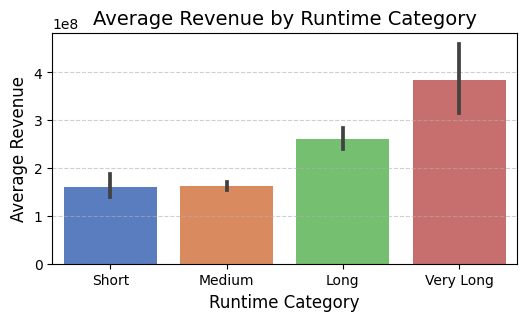

In [207]:
# Define runtime categories
def categorize_runtime(value):
    if value < 90:
        return 'Short'
    elif value < 120:
        return 'Medium'
    elif value < 150:
        return 'Long'
    else:
        return 'Very Long'

df_high_revenue['runtime_category'] = df_high_revenue['runtime'].apply(categorize_runtime)

# Bar plot: Runtime categories vs Average Revenue
plt.figure(figsize=(6,3))
sns.barplot(data=df_high_revenue, x='runtime_category', y='revenue_adj', palette="muted", order=['Short', 'Medium', 'Long', 'Very Long'])

plt.title("Average Revenue by Runtime Category", fontsize=14)
plt.xlabel("Runtime Category", fontsize=12)
plt.ylabel("Average Revenue", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### **Popularity Distribution in High-Revenue Movies**
- A **histogram** was used to analyze the **distribution of popularity scores**.
- Most high-revenue movies have **low to moderate popularity scores**, with **very few exceeding a popularity score of 10**.
- The histogram shows a **right-skewed distribution**, meaning that the majority of high-revenue movies have lower popularity scores, while only a few movies achieve exceptionally high popularity.
- This suggests that while popularity plays a role, extreme popularity is not a strict requirement for high revenue.

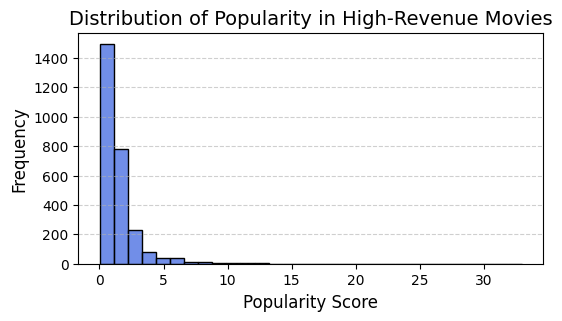

In [208]:
# Histogram: Revenue distribution across different popularity scores
plt.figure(figsize=(6,3))
sns.histplot(df_high_revenue['popularity'], bins=30, color="royalblue")

plt.title("Distribution of Popularity in High-Revenue Movies", fontsize=14)
plt.xlabel("Popularity Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### **Vote Count Distribution in High-Revenue Movies**
- A **histogram** of vote counts revealed that the majority of high-revenue movies **receive a moderate number of votes**.
- The histogram also exhibits a **right-skewed distribution**, where most movies have relatively low vote counts, but a few movies receive significantly high numbers of votes.
- This indicates that while most high-revenue movies do not need an overwhelming number of votes, a **small portion of films with extremely high vote counts** may be significantly influencing overall revenue.

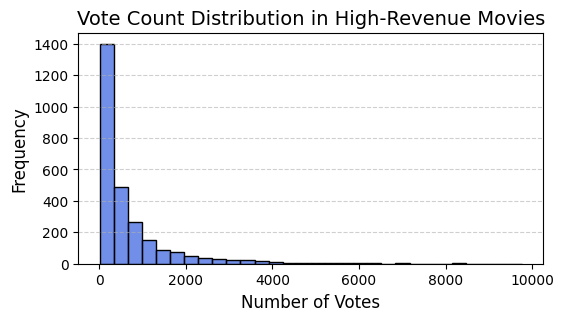

In [209]:
# Histogram: Distribution of vote counts in high-revenue movies
plt.figure(figsize=(6,3))
sns.histplot(df_high_revenue['vote_count'], bins=30, color="royalblue")

plt.title("Vote Count Distribution in High-Revenue Movies", fontsize=14)
plt.xlabel("Number of Votes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

---
#### Summary of Findings
From these findings, we observe:
- **Higher budgets and longer runtimes are strong indicators of higher revenue.**
- **Popularity and vote count distributions** suggest that while audience engagement is important, most high-revenue movies do not rely solely on extreme popularity or vote counts.
- **The biggest predictor of revenue remains budget size**, with **higher investment leading to higher financial returns**.
- **Right-skewed distributions** in popularity and vote count suggest that while most high-revenue movies fall in a moderate range, a few highly popular movies contribute disproportionately to overall revenue.

This analysis helps in understanding the primary factors associated with successful, high-earning movies.

---

<a id='conclusions'></a>
## Conclusions

### Summary of Findings  

In this analysis, we explored two key questions related to **movie popularity and revenue**:  

**1. Which genres are most popular from year to year?**  
- Using **genre-based filtering and multiple visualizations**, we observed that **Adventure, Science Fiction, Fantasy, and Animation** were consistently among the most popular genres.  
- The **yearly popularity trend analysis** highlighted how audience preferences shifted over time.  
- The **genre count visualization** revealed which genres appeared most frequently as the most popular in a given year.  

**2. What kinds of properties are associated with movies that have high revenues?**  
- We **categorized movies based on budget and runtime** to analyze their impact on revenue.  
- **Higher budgets consistently led to higher revenues**, suggesting that production investment strongly correlates with financial success.  
- **Longer runtime movies** tended to generate higher revenue, but there were still some shorter films with strong earnings.  
- **Popularity and vote count histograms** revealed a **right-skewed distribution**, showing that while most high-revenue movies have moderate popularity and vote counts, a few outliers receive extremely high engagement.  

---

### Limitations  

While this analysis provides **valuable insights**, there are several **limitations** to consider:  

- **No direct causal relationships**: This study is **correlational**, meaning we cannot definitively claim that certain properties **cause** higher revenue or popularity.  
- **Inflation Adjustments**: The dataset provides **adjusted revenue**, but changes in audience size, streaming trends, and global box office growth over time were not accounted for.  
- **External Factors**: Marketing, star power, audience reception, and **global events** significantly impact a movie's performance but were **not included** in the dataset.  
- **Missing Data**: Some columns had missing values that we removed, which may have affected the analysis.  

---

### Future Considerations  

To expand this analysis further, future work could:  

- **Incorporate audience ratings and reviews** to understand the relationship between **critic scores and revenue**.  
- **Analyze streaming-era movie trends** to see how modern platforms like **Netflix and Disney+** impact movie success.  
- **Study marketing spend vs. revenue** to identify how advertising influences box office returns.  
- **Use machine learning models** to predict revenue based on various movie properties.  

---

### Final Remarks  

This project provided **insights into movie trends**, revealing how **genre popularity** and **key production factors** contribute to a movie’s success. While we identified **strong correlations**, further research would be needed to draw deeper conclusions about what truly drives **financial and audience success in the film industry**.  


In [210]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 571811 bytes to Investigate_a_Dataset.html
